In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import seaborn as sns


In [3]:
data=pd.read_csv('C:\\Users\\DELL\\Desktop\\Practice\\data\\house_prices.csv')

In [4]:
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,yes,East
1,2,114200,2030,4,2,3,yes,East
2,3,114800,1740,3,2,1,yes,East
3,4,94700,1980,3,2,3,yes,East
4,5,119800,2130,3,3,3,yes,East


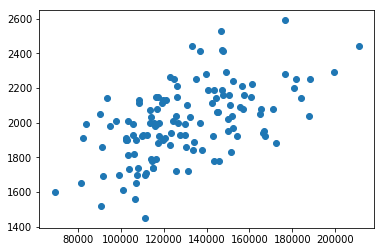

In [5]:
#plot a scatter plot to check the relationship between sqft and price
plt.scatter(data.Price,data.SqFt)

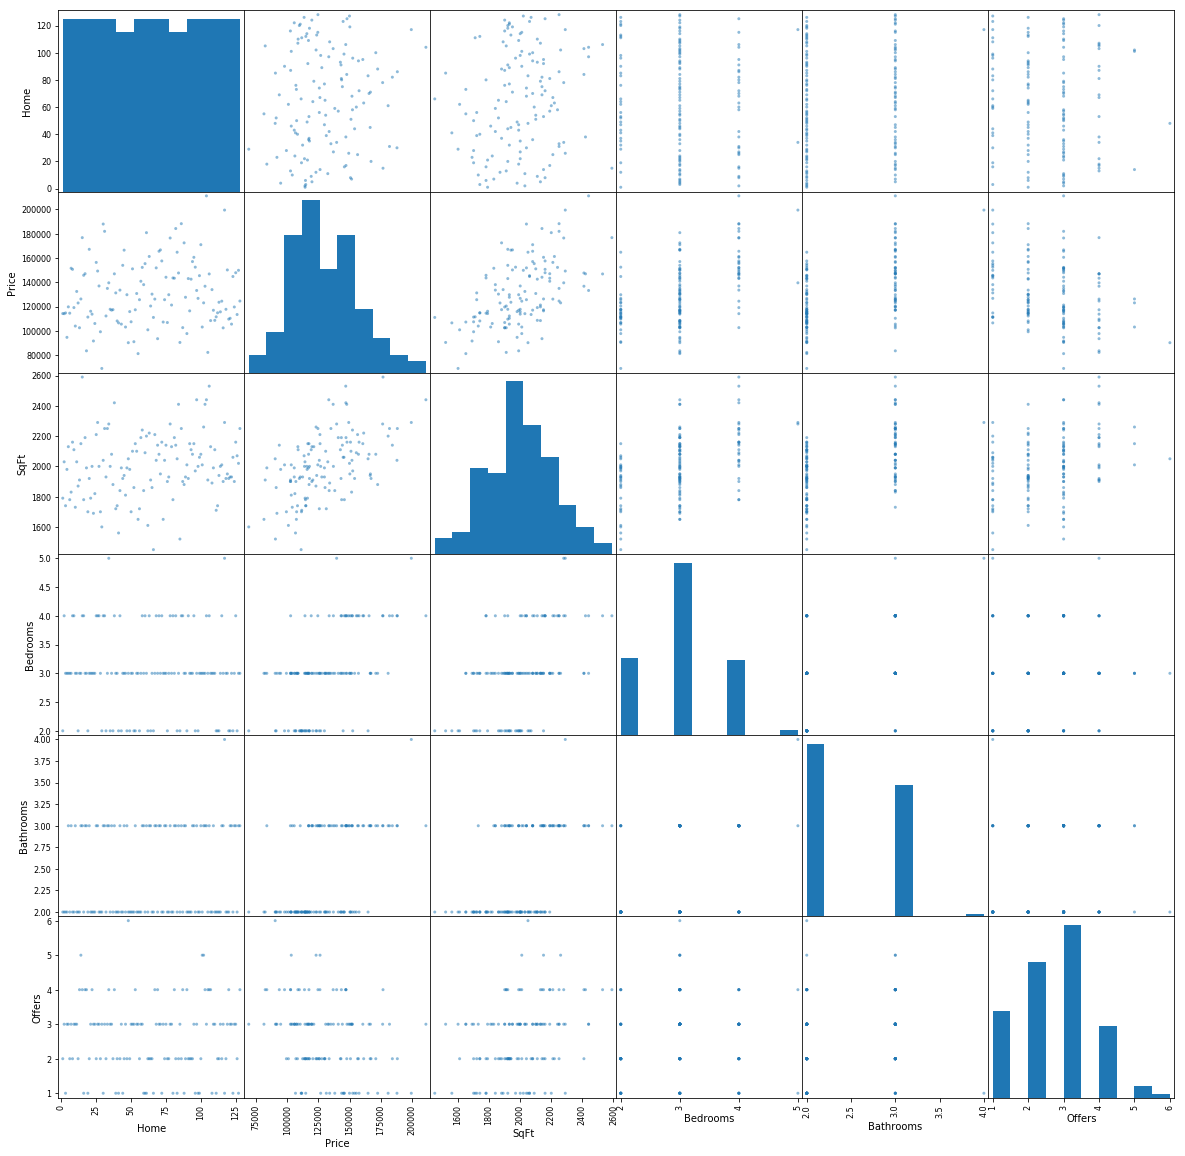

In [6]:
#check distribution of data and also relationship between factors
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,20))
plt.show()

In [9]:
#dropping unnecessary columns
data.drop('Home',inplace=True, axis=1)

KeyError: "labels ['Home'] not contained in axis"

In [8]:
data.head(3)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,yes,East
1,114200,2030,4,2,3,yes,East
2,114800,1740,3,2,1,yes,East


In [10]:
corr=data.corr()

In [11]:
print(corr)

              Price      SqFt  Bedrooms  Bathrooms    Offers
Price      1.000000  0.552982  0.525926   0.523258 -0.313636
SqFt       0.552982  1.000000  0.483807   0.522745  0.336923
Bedrooms   0.525926  0.483807  1.000000   0.414556  0.114271
Bathrooms  0.523258  0.522745  0.414556   1.000000  0.143793
Offers    -0.313636  0.336923  0.114271   0.143793  1.000000


In [12]:
#check for missing values
data.isnull().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

Predicting house prices 


In [13]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(data[['SqFt']],data.Price)
reg.predict(5000)

array([341040.4613053])

In [15]:
data1=pd.read_csv('C:\\Users\\DELL\\Desktop\\Practice\\data\\house_prices.csv')
data1.isnull().sum()



Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

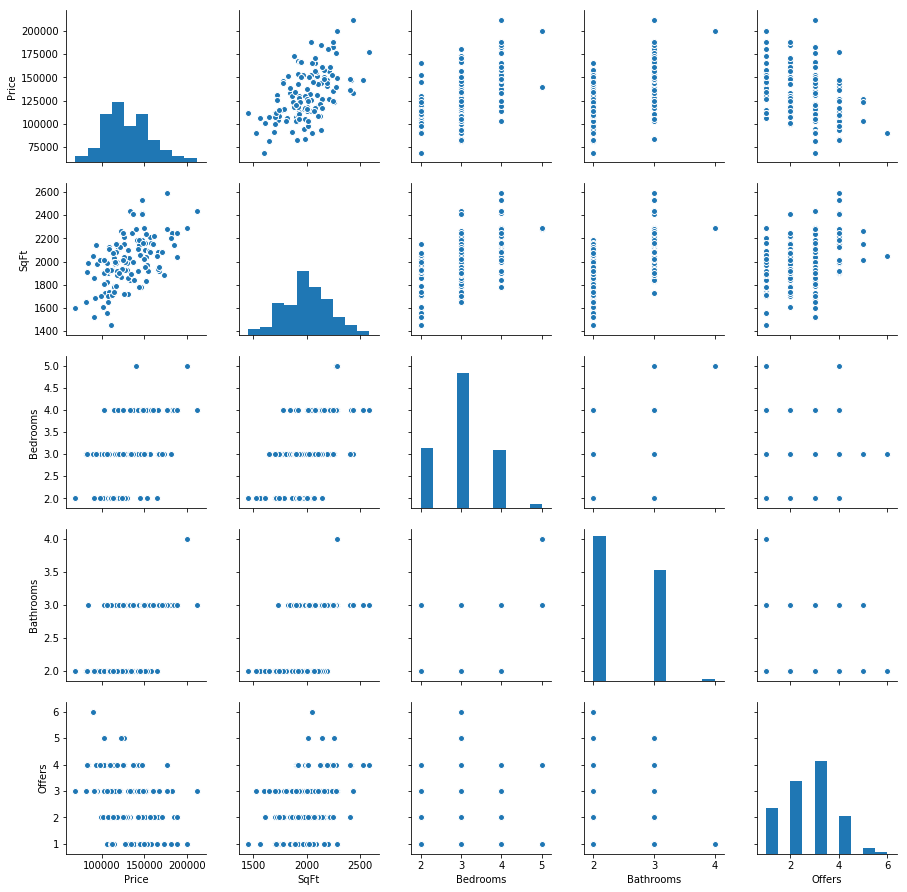

In [16]:
sns.pairplot(data1[['Price','SqFt','Bedrooms','Bathrooms','Offers','Brick','Neighborhood']])

In [17]:
data1.drop('Home',inplace=True, axis=1)

In [18]:
data1.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,yes,East
1,114200,2030,4,2,3,yes,East
2,114800,1740,3,2,1,yes,East
3,94700,1980,3,2,3,yes,East
4,119800,2130,3,3,3,yes,East


In [19]:
dummiesB=pd.get_dummies(data1.Brick)
dummiesN=pd.get_dummies(data1.Neighborhood)

In [20]:
dfn=pd.concat([data1,dummiesB,dummiesN], axis='columns')

In [21]:
dfn.head(3)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,no,yes,East,North,West
0,114300,1790,2,2,2,yes,East,0,1,1,0,0
1,114200,2030,4,2,3,yes,East,0,1,1,0,0
2,114800,1740,3,2,1,yes,East,0,1,1,0,0


In [22]:
dfn.drop(['Brick','Neighborhood'], inplace=True, axis=1)

In [23]:
dfn.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'no', 'yes', 'East',
       'North', 'West'],
      dtype='object')

Perform regression

In [24]:
X=dfn[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'no', 'yes', 'East','North', 'West']]
Y=dfn['Price']

In [25]:
import statsmodels.api as sm
from sklearn import linear_model

In [27]:
model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           8.25e-50
Time:                        21:11:43   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SqFt          52.9937      5.734      9.242      0.0

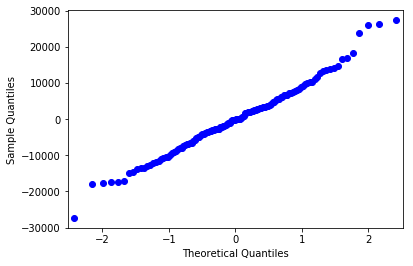

In [28]:
#check if errors folow normal dist
import statsmodels.api as sm
res=results.resid
fig = sm.qqplot(res)
plt.show()

In [28]:
corr=X.corr()
print(corr)

               SqFt  Bedrooms  Bathrooms    Offers        no       yes  \
SqFt       1.000000  0.483807   0.522745  0.336923  0.079792 -0.079792   
Bedrooms   0.483807  1.000000   0.414556  0.114271  0.046380 -0.046380   
Bathrooms  0.522745  0.414556   1.000000  0.143793  0.171977 -0.171977   
Offers     0.336923  0.114271   0.143793  1.000000 -0.144986  0.144986   
no         0.079792  0.046380   0.171977 -0.144986  1.000000 -1.000000   
yes       -0.079792 -0.046380  -0.171977  0.144986 -1.000000  1.000000   
East       0.045639 -0.091750  -0.001247 -0.015602  0.147564 -0.147564   
North     -0.288886 -0.364667  -0.275830  0.332987 -0.260554  0.260554   
West       0.250759  0.471477   0.285923 -0.327425  0.115793 -0.115793   

               East     North      West  
SqFt       0.045639 -0.288886  0.250759  
Bedrooms  -0.091750 -0.364667  0.471477  
Bathrooms -0.001247 -0.275830  0.285923  
Offers    -0.015602  0.332987 -0.327425  
no         0.147564 -0.260554  0.115793  
yes    

In [29]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['Lagrange multiplier statistic','p-value','f-value','fp-value']
test=sms.het_breushpagan(results.resid,results.model.exog)
lzip(name,test)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('Lagrange multiplier statistic', 5.843350767970321),
 ('p-value', 0.6647738192181326),
 ('f-value', 0.8200268104984538),
 ('fp-value', 0.5724671531997805)]

Breusch pagan test shows the relationship or pattern between residuals and fitted values

According to assumptions for regression the residuals should be homoscedastic (equal variance) i.e. the variance around regression line should be same for all the values of predictor variable. There should be no relation between residuals and fitted values

Here p value>0.05
 Thus heteroscedasticity is present
 



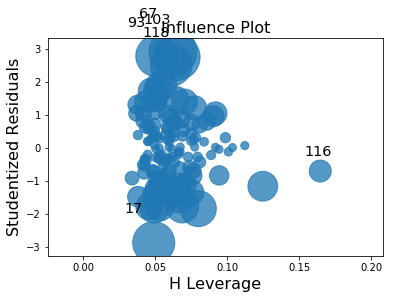

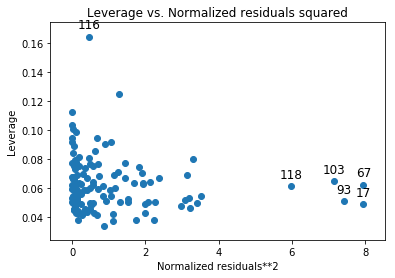

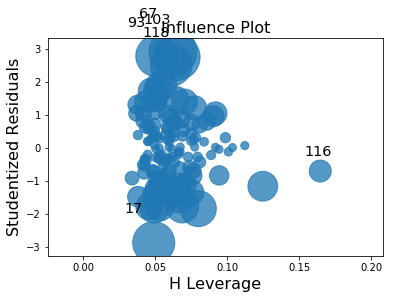

In [30]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(results)
influence_plot(results)


The above plot shows the residual on the vertical axis, leverage on the horizontal axis, 
and the point size is the  measure of the influence of the point.
Leverage is the potential for a case to have an influence on the model. You can identify points with high leverage as those furthest to the right. A point with high leverage may not have much influence on the model if it fits the overall model without that case.
Influence combines the leverage and residual of a case to measure how the parameter estimates would change if that case were excluded. Points with a large residual and high leverage have the most influence. They can have an adverse effect on the model if they are changed or excluded, making the model less robust. 